In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [12]:
data = load_boston()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
features = df.drop(columns=['Price'])
label = df['Price']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

## Linear Regression

In [40]:
lr_model = LinearRegression()
mse = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lr_model.fit(X_train, y_train)
print('MSE :', np.mean(mse))

MSE : -24.231844890715266


## Ridge Regression

In [27]:
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-1, 1, 5, 10, 50, 100, 120, 150, 200]}

ridge_model = Ridge()
ridge_model = GridSearchCV(ridge_model, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_model.fit(X_train, y_train)

print('Best Param :', ridge_model.best_params_)
print('       MSE :', ridge_model.best_score_)

Best Param : {'alpha': 0.1}
       MSE : -24.20653278045591


/home/parthikb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Lasso Regression

In [36]:
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1e-1, 1, 5, 10, 50, 100, 120, 150, 200]}

lasso_model = Lasso()
lasso_model = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_model.fit(X_train, y_train)

print('Best Param :', lasso_model.best_params_)
print('       MSE :', lasso_model.best_score_)

/home/parthikb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3300.657059165601, tolerance: 2.6100909226006195
  positive)
/home/parthikb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3154.2308527810023, tolerance: 2.5990335541795666
  positive)
/home/parthikb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2845.423893276206, tolerance: 2.719427157894737
  positive)
/home/parthikb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to incre

Best Param : {'alpha': 0.001}
       MSE : -24.22170180532071


/home/parthikb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Predictions

In [41]:
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
lr_pred    = lr_model.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

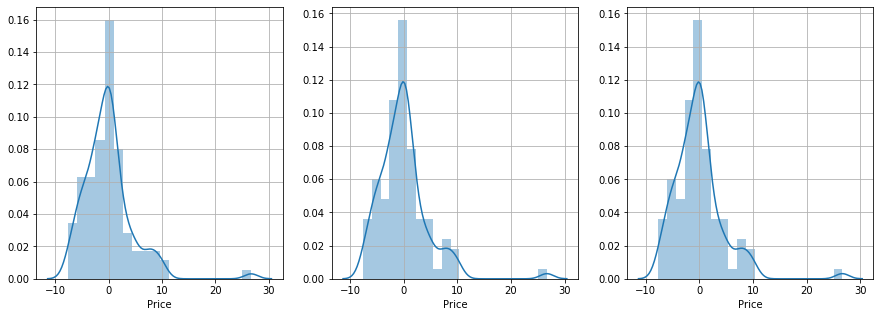

In [52]:
plt.figure(figsize=(15, 5))
for idx, pred in enumerate([ridge_pred, lasso_pred, lr_pred]):
    plt.subplot(1, 3, idx+1)
    sns.distplot(y_test-pred)
    plt.grid(1)